In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_test.shape

(10000, 28, 28)

In [6]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

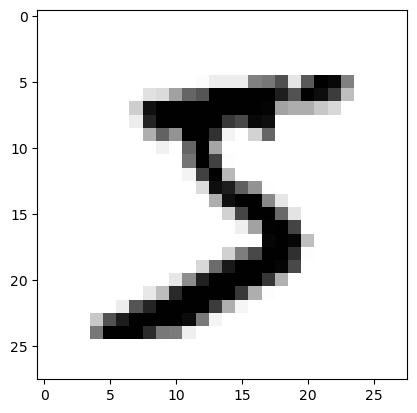

In [7]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [8]:
y_train[0]

5

In [9]:
from keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [14]:
model = Sequential()

model.add(Conv2D(50,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(25,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 42s 20ms/step - loss: 0.3107 - val_loss: 0.0902
Epoch 2/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0875 - val_loss: 0.0709
Epoch 3/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0711 - val_loss: 0.0804
Epoch 4/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0635 - val_loss: 0.0929
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0574 - val_loss: 0.0633
Epoch 6/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0546 - val_loss: 0.0619
Epoch 7/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0493 - val_loss: 0.0587
Epoch 8/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0474 - val_loss: 0.0683
Epoch 9/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0445 - val_loss: 0.0604
Epoch 10/20
1875/1875 [==============================] - 48s 26m

<AxesSubplot:>

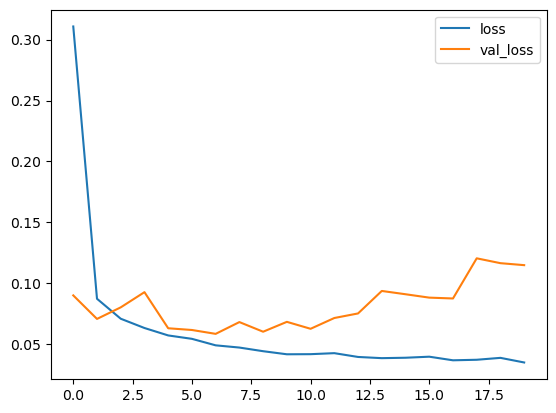

In [16]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
earlyStop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=3)

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential()

model.add(Conv2D(50,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(25,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_test,y_test),callbacks=[earlyStop])

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 1.6228 - val_loss: 0.1712
Epoch 2/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3109 - val_loss: 0.1091
Epoch 3/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2396 - val_loss: 0.0856
Epoch 4/20
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2146 - val_loss: 0.0752
Epoch 5/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1994 - val_loss: 0.0590
Epoch 6/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1892 - val_loss: 0.0689
Epoch 7/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1784 - val_loss: 0.0655
Epoch 8/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1789 - val_loss: 0.0660
Epoch 8: early stopping


<AxesSubplot:>

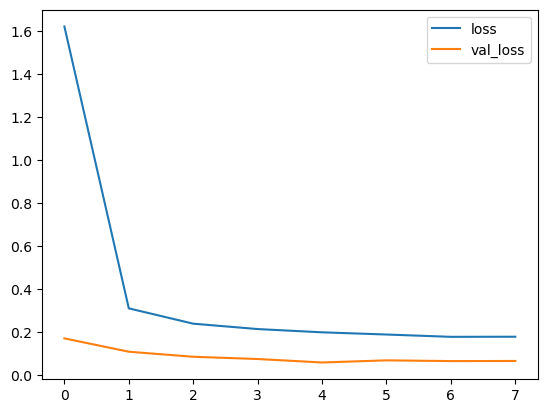

In [22]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [23]:
ypred = model.predict(X_test)
ypred.shape

313/313 [==============================] - 4s 5ms/step


(10000, 10)

In [24]:
ypred[0]

array([4.5716587e-07, 4.0430120e-08, 2.4957413e-05, 9.3552953e-05,
       2.5298736e-08, 2.5964262e-08, 1.2078233e-12, 9.9987638e-01,
       3.6936621e-07, 4.1797257e-06], dtype=float32)

In [25]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

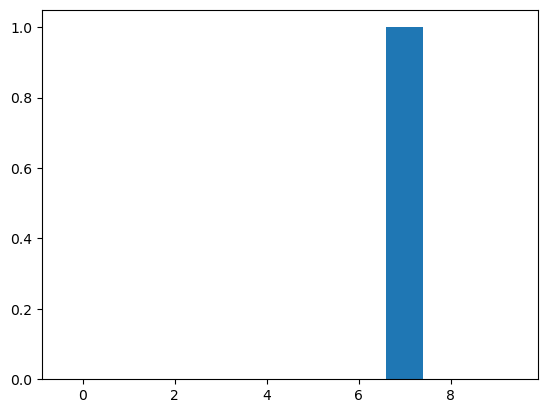

In [26]:
plt.bar(x=range(10), height=ypred[0])
plt.show()

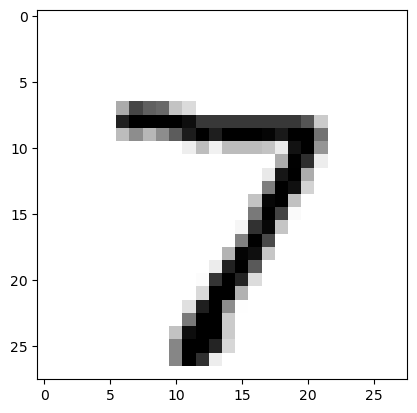

In [27]:
plt.imshow(X_test[0], cmap='binary')
plt.show()

In [28]:
np.where(np.max(ypred,axis=1)<0.55)

(array([  73,  184,  241,  324,  358,  447,  497,  552,  571,  582,  583,
         619,  659,  740,  844,  898, 1039, 1050, 1156, 1178, 1206, 1226,
        1242, 1248, 1326, 1328, 1364, 1500, 1553, 1686, 1691, 1709, 1737,
        1759, 1982, 2018, 2043, 2052, 2129, 2130, 2179, 2189, 2200, 2237,
        2272, 2293, 2398, 2422, 2488, 2526, 2654, 2780, 2930, 2938, 2970,
        2995, 3060, 3062, 3129, 3329, 3330, 3369, 3384, 3474, 3511, 3534,
        3597, 3749, 3767, 3780, 3833, 3853, 3926, 3954, 3988, 4163, 4199,
        4359, 4369, 4439, 4454, 4482, 4543, 4571, 4740, 4743, 4837, 4860,
        4886, 4956, 5086, 5152, 5298, 5331, 5634, 5997, 6091, 6495, 6555,
        6558, 6560, 6568, 6571, 6576, 6603, 6625, 6740, 6744, 7235, 7432,
        7434, 7902, 8020, 8059, 8061, 8246, 8316, 8520, 9071, 9539, 9620,
        9679, 9692, 9749, 9768, 9792, 9904], dtype=int64),)

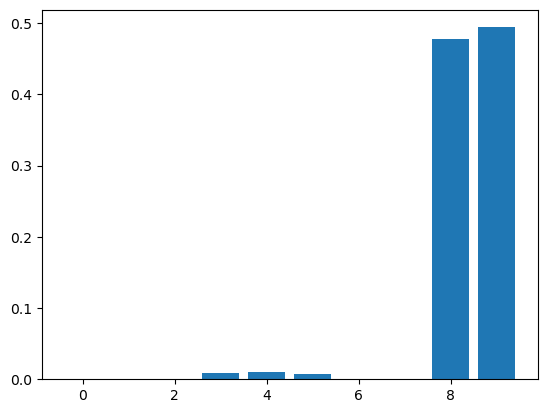

In [36]:
plt.bar(x=range(10),height=ypred[241])
plt.show()

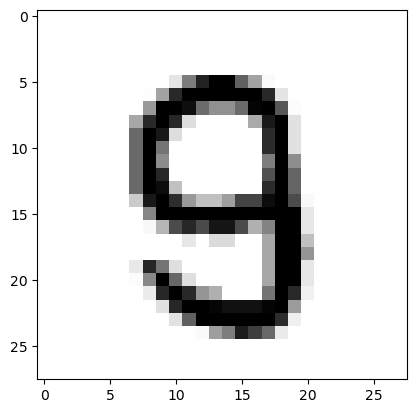

In [37]:
plt.imshow(X_test[241],cmap='binary')
plt.show()